# Exploring Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
import sys

print('Python', sys.version)

print(pd.__name__, pd.__version__)
print(np.__name__, np.__version__)
print(matplotlib.__name__, matplotlib.__version__)
print(sns.__name__, sns.__version__)
print(sklearn.__name__, sklearn.__version__)

Python 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
pandas 0.22.0
numpy 1.14.0
matplotlib 2.1.2
seaborn 0.8.1
sklearn 0.19.1


In [4]:
### Load dataset
iris = sns.load_dataset('iris')

#### Let's explore the data.

In [5]:
iris.sample(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
64,5.6,2.9,3.6,1.3,versicolor
36,5.5,3.5,1.3,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor
22,4.6,3.6,1.0,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
96,5.7,2.9,4.2,1.3,versicolor
83,6.0,2.7,5.1,1.6,versicolor
89,5.5,2.5,4.0,1.3,versicolor
15,5.7,4.4,1.5,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


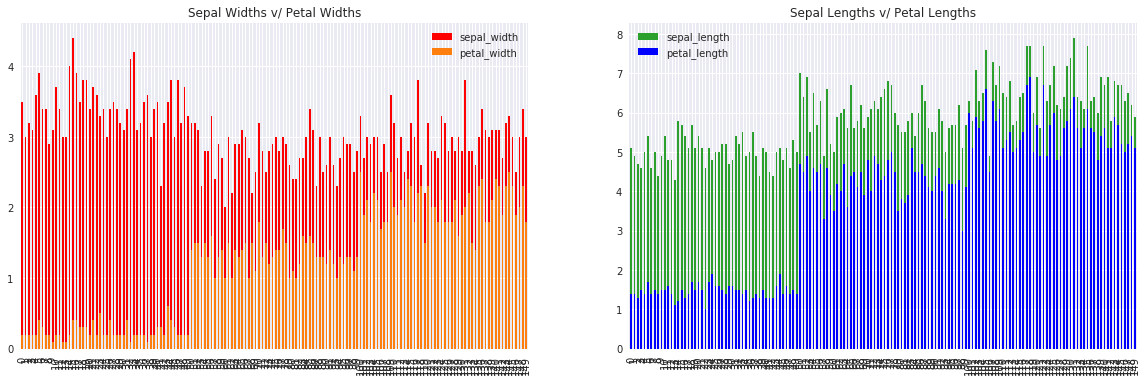

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6), sharex=True)

# sns.barplot(data=iris, x='species', y='petal_width')
# plt.figure(figsize=(20, 10))

iris['sepal_width'].plot('bar', legend=True, ax=ax[0], color='red')
iris['petal_width'].plot('bar', legend=True, ax=ax[0], color='tab:orange')
ax[0].set_title('Sepal Widths v/ Petal Widths')

iris['sepal_length'].plot('bar', legend=True, ax=ax[1], color='tab:green')
iris['petal_length'].plot('bar', legend=True, ax=ax[1], color='blue')
ax[1].set_title('Sepal Lengths v/ Petal Lengths')

plt.show()

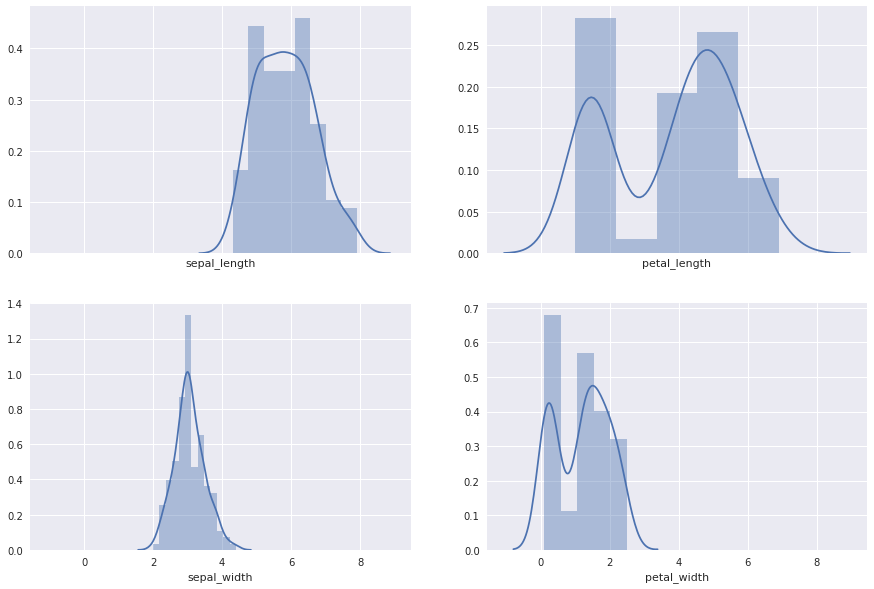

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10), sharex=True)

sns.distplot(iris['sepal_length'], ax=ax[0,0])
sns.distplot(iris['petal_length'], ax=ax[0,1])
sns.distplot(iris['sepal_width'], ax=ax[1,0])
sns.distplot(iris['petal_width'], ax=ax[1,1])

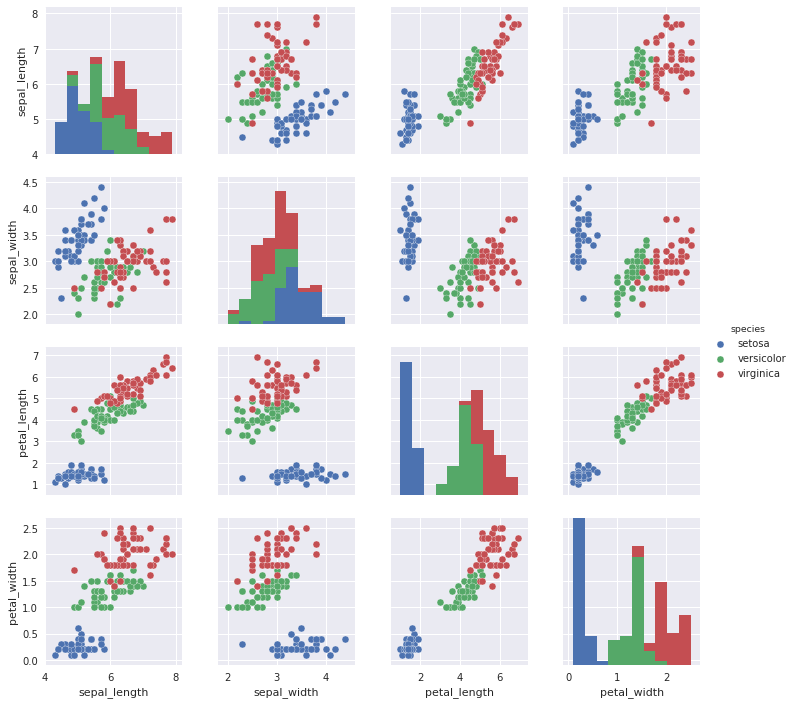

In [10]:
sns.pairplot(iris, hue='species')

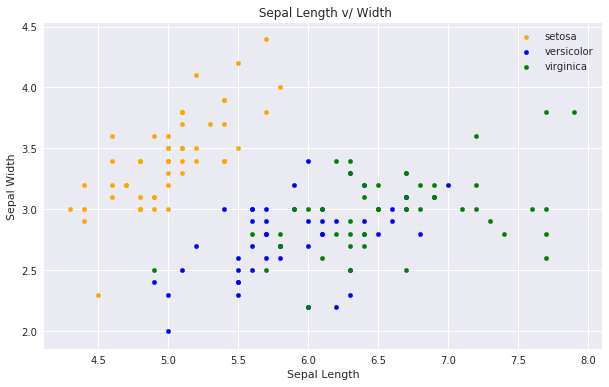

In [11]:
fig = iris[iris.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', color='orange', label='setosa')
iris[iris.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', color='blue', label='versicolor', ax=fig)
iris[iris.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title(" Sepal Length v/ Width")
fig=plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

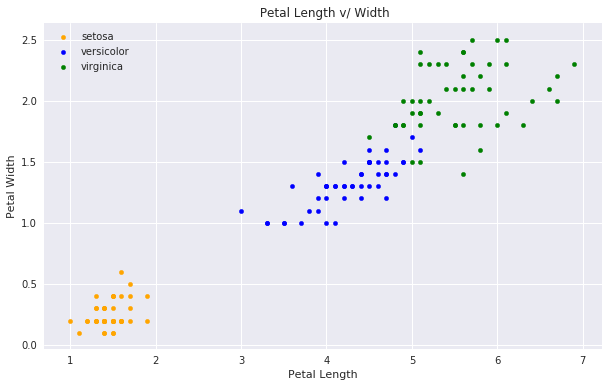

In [12]:
fig = iris[iris.species=='setosa'].plot.scatter(x='petal_length', y='petal_width', color='orange', label='setosa')
iris[iris.species=='versicolor'].plot.scatter(x='petal_length', y='petal_width', color='blue', label='versicolor', ax=fig)
iris[iris.species=='virginica'].plot.scatter(x='petal_length', y='petal_width', color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length v/ Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

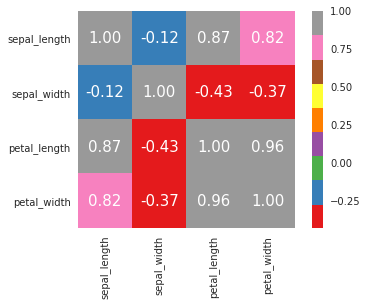

In [13]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
corr_matrix = iris[cols].corr()

heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols, cmap='Set1')

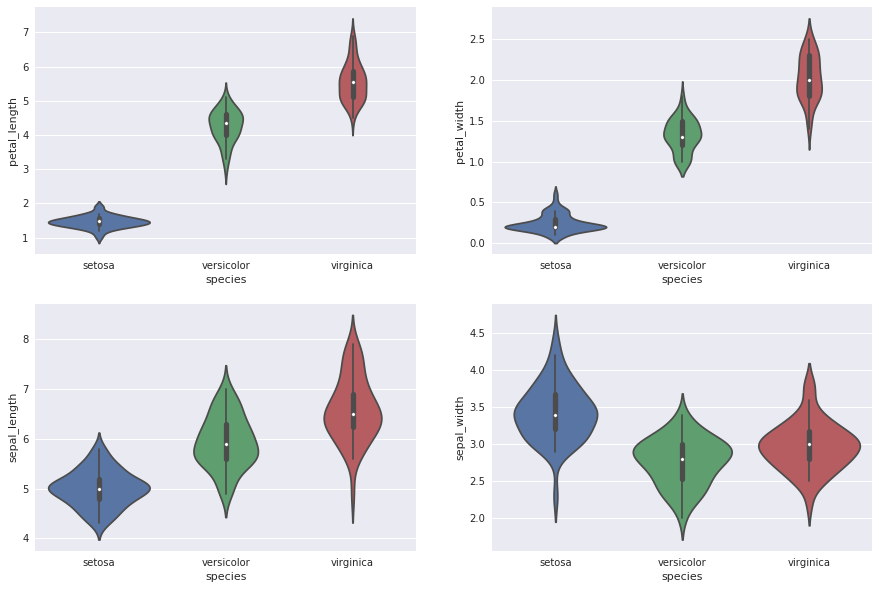

In [14]:
strip_plot = False

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
if strip_plot: ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
if strip_plot: ax = sns.stripplot(x="species", y="petal_width", data=iris, jitter=True, edgecolor="gray")

plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
if strip_plot: ax = sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True, edgecolor="gray")

plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
if strip_plot: ax = sns.stripplot(x="species", y="sepal_width", data=iris, jitter=True, edgecolor="gray")

### Split the data from training and testing

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.drop('species', axis=1), iris['species'], test_size=0.33, random_state=323)

### This gives 0% accuracy
# x = iris.drop('species', axis=1); y = iris['species']
# x_train, x_test, y_train, y_test = (x[:100], x[100:], y[:100], y[100:])

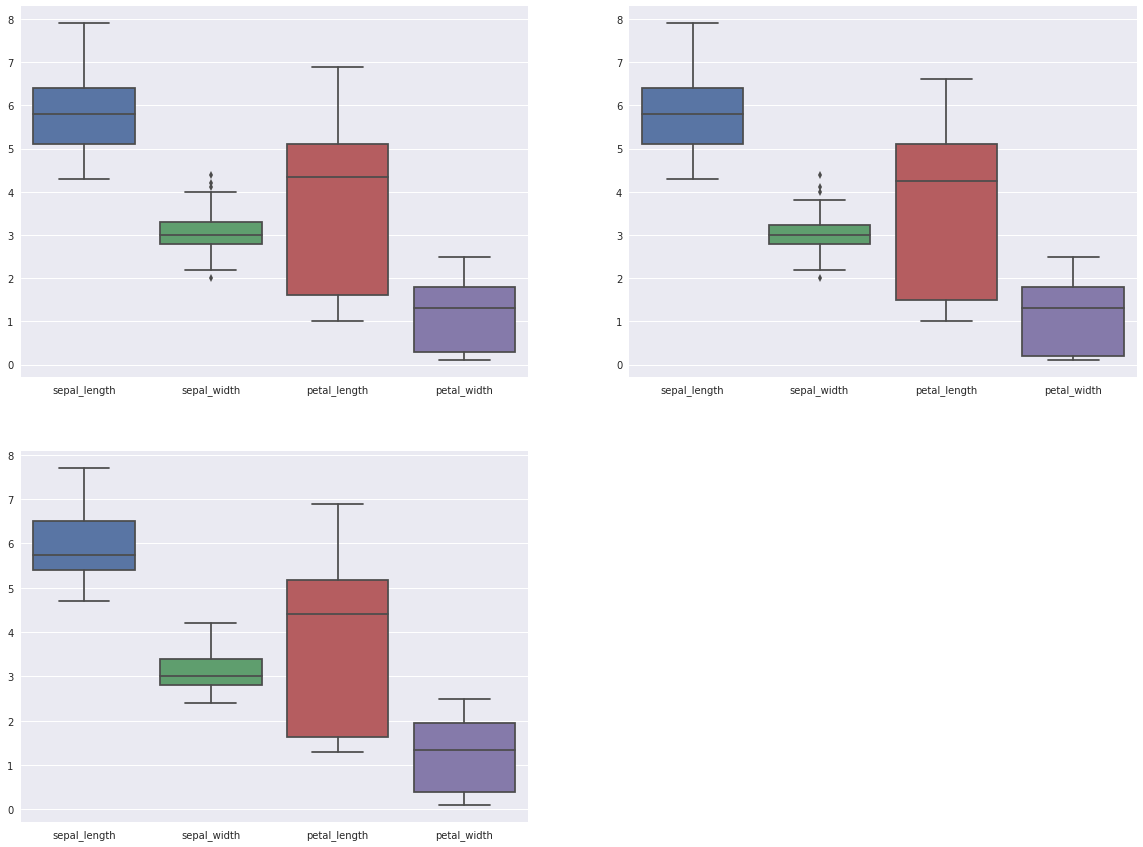

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(data=iris)

plt.subplot(2,2,2)
sns.boxplot(data=x_train)

plt.subplot(2,2,3)
sns.boxplot(data=x_test)

#### Let's take a peek in test and training data.

In [17]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
73,6.1,2.8,4.7,1.2
105,7.6,3.0,6.6,2.1
125,7.2,3.2,6.0,1.8
76,6.8,2.8,4.8,1.4


In [18]:
y_train.head()

6          setosa
73     versicolor
105     virginica
125     virginica
76     versicolor
Name: species, dtype: object

In [19]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
5,5.4,3.9,1.7,0.4
9,4.9,3.1,1.5,0.1
31,5.4,3.4,1.5,0.4
98,5.1,2.5,3.0,1.1


In [20]:
y_test.head()

33        setosa
5         setosa
9         setosa
31        setosa
98    versicolor
Name: species, dtype: object

In [21]:
models = [] ### Add different models here for cross validation later

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression?

In [23]:
lr = LogisticRegression(C=10, intercept_scaling=0.25, tol=1e-8)
lr

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.25, max_iter=100, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
          tol=1e-08, verbose=0, warm_start=False)

In [24]:
########## Tuning hyperparameters #############################################
# from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

# params = {
#     "C": [0.01, 0.001, 0.001, 0.0001, 0.00001, 0.1, 1, 10, 100, 1000, 10000],
#     "fit_intercept": [True, False],
#     "penalty": ["l2"],
#     "tol":     "tol": [1e-8, 1e-4],
#     "intercept_scaling": [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
#     "solver": ["newton-cg", "lbfgs", "liblinear"], # "sag", "saga"],
#     "max_iter": [100, 200, 500, 1000, 10000], 
# }

# grid = GridSearchCV(lr, params, verbose=True)
# grid.fit(x_train, y_train)
# print(grid.best_params_)
# print(grid.score(x_test, y_test))

In [25]:
# lr.fit(x_train, y_train)

models.append(("LR", lr))
models.append(("LR untuned", LogisticRegression()))

In [26]:
from sklearn.metrics import accuracy_score

# y_model = lr.predict(x_test)
# accuracy_score(y_model, y_test)

## (lr.predict(x_test) == y_test).value_counts()

### Support Vector Classifier

In [27]:
from sklearn.svm import SVC

model = SVC(C=10, kernel='linear', tol=1e-8)

# model.fit(x_train, y_train)

print(model)

models.append(("SVC", model))
models.append(("SVC untuned", SVC()))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-08, verbose=False)


In [28]:
# ########## Tuning hyperparameters of SVM #############################################
# from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

# params = {
#     "C": [0.01, 0.001, 0.001, 0.0001, 0.00001, 0.1, 1, 10, 100, 1000, 10000],
#     "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [3, 4, 5],
#     "shrinking": [True, False],
#     "tol": [1e-8, 1e-4],
# }

# grid = GridSearchCV(model, params, verbose=True)
# grid.fit(x_train, y_train)
# print(grid.best_params_)
# print(grid.score(x_test, y_test))

In [29]:
# y_model = model.predict(x_test)
# accuracy_score(y_model, y_test)

### Decision Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, presort=True)

# model.fit(x_train, y_train)

models.append(("DTC", model))
models.append(("DTC untuned", DecisionTreeClassifier()))

# y_model = model.predict(x_test)
# accuracy_score(y_model, y_test)

In [31]:
# ########## Tuning hyperparameters of DecisionClassifier #############################################
# from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

# params = {
#     "criterion": ['gini', 'entropy'],
#     "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
#     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
# #     "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
# #     "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.5],
#     "max_features": ["auto", "sqrt", "log2", 1,2,3,4, None],
#     "presort": [True, False],
# }

# grid = GridSearchCV(model, params, verbose=True)
# grid.fit(x_train, y_train)
# print(grid.best_params_)
# print(grid.score(x_test, y_test))

### K-Nearest Neighbours Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# model.fit(x_train, y_train)

models.append(("KNN", model))

# y_model = model.predict(x_test)
# accuracy_score(y_model, y_test)

In [33]:
# ########## Tuning hyperparameters of KNN #############################################
# from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

# params = {
#     "weights": ['uniform', 'distance'],
#     "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
#     'leaf_size': [1,2,3,4,5,10,20, 30, 40, 50],
#     "p": [1,2,3, 4,5,6,7,8,9],
# }

# grid = GridSearchCV(model, params, verbose=True)
# grid.fit(x_train, y_train)
# print(grid.best_params_)
# print(grid.score(x_test, y_test))

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, random_state=0)

model.fit(x_train, y_train)

models.append(("RFC", model))

# y_model = model.predict(x_test)
# accuracy_score(y_model, y_test)

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

model = GaussianNB()

model.fit(x_train, y_train)\

models.append(("GNB", model))

# y_model = model.predict(x_test)
# print(accuracy_score(y_model, y_test))

model = MultinomialNB()

# model.fit(x_train, y_train)

models.append(("MNB", model))

# y_model = model.predict(x_test)

# print(accuracy_score(y_model, y_test))

### Results:

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, iris.drop('species', axis=1), iris['species'], cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.9199999999999999
LR untuned 0.8799999999999999
SVC 0.9533333333333334
SVC untuned 0.9533333333333334
DTC 0.9400000000000001
DTC untuned 0.9466666666666667
KNN 0.9466666666666667
RFC 0.9133333333333333
GNB 0.9466666666666667
MNB 0.3933333333333333


[Text(0,0,'LR'),
 Text(0,0,'LR untuned'),
 Text(0,0,'SVC'),
 Text(0,0,'SVC untuned'),
 Text(0,0,'DTC'),
 Text(0,0,'DTC untuned'),
 Text(0,0,'KNN'),
 Text(0,0,'RFC'),
 Text(0,0,'GNB'),
 Text(0,0,'MNB')]

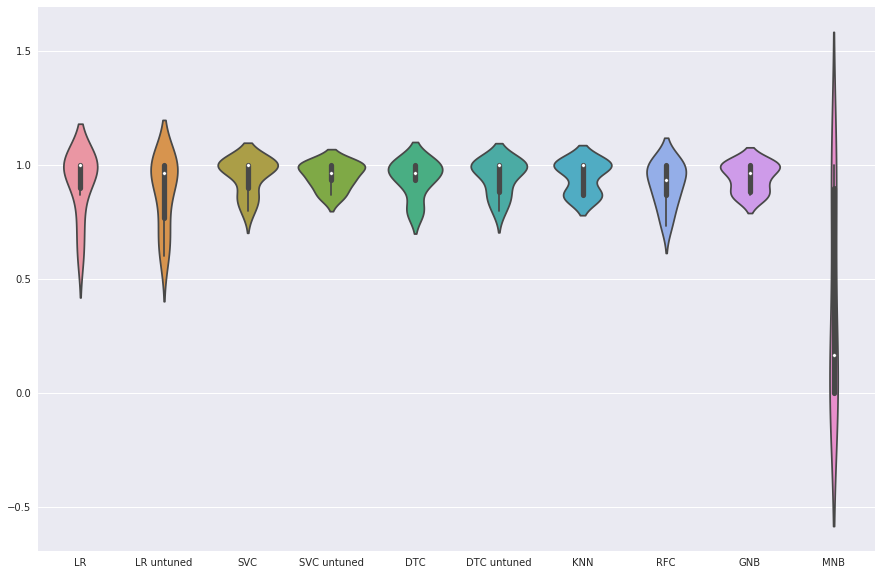

In [37]:
plt.figure(figsize=(15, 10))
ax = sns.violinplot(data=results)
ax.set_xticklabels(names)

### Dimension Reduction

#### PCA
**To-do**: Review later. Not accurate than previous.

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

iris['pca0'] = pca.fit(iris.drop('species', axis=1)).transform(iris.drop('species', axis=1))[:, 0]
iris['pca1'] = pca.fit(iris.drop('species', axis=1)).transform(iris.drop('species', axis=1))[:, 1]

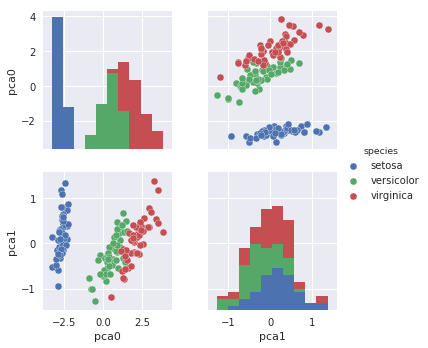

In [39]:
sns_data = iris[['species', 'pca0', 'pca1']]
sns.pairplot(data=sns_data, hue='species')

iris.drop(['pca0', 'pca1'], axis=1, inplace=True)

In [40]:
sns_data.head()

,species,pca0,pca1
0,setosa,-2.684126,0.319397
1,setosa,-2.714142,-0.177001
2,setosa,-2.888991,-0.144949
3,setosa,-2.745343,-0.318299
4,setosa,-2.728717,0.326755


In [41]:
lr1 = LogisticRegression()

x1_train, x1_test, y1_train, y1_test = train_test_split(sns_data.drop('species', axis=1), sns_data['species'], test_size=0.33, random_state=323)

lr1.fit(x1_train, y1_train)

y1_model= lr1.predict(x1_test)

accuracy_score(y1_model, y1_test)

0.9

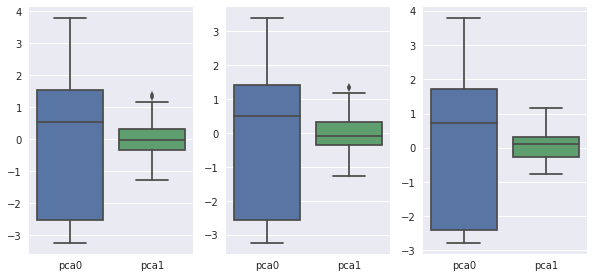

In [42]:
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
sns.boxplot(data=sns_data)

plt.subplot(2,3,2)
sns.boxplot(data=x1_train)

plt.subplot(2,3,3)
sns.boxplot(data=x1_test)

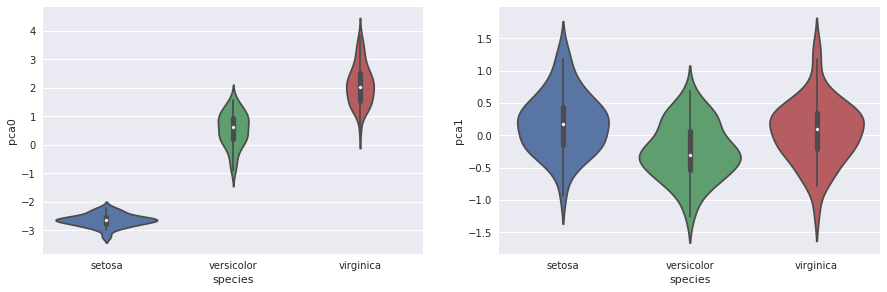

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='pca0', data=sns_data)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='pca1', data=sns_data)

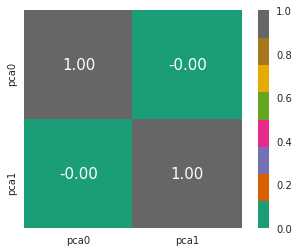

In [44]:
cols = ['pca0', 'pca1']
corr_matrix = sns_data[cols].corr()

heatmap = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols, cmap='Dark2')